# Local Data Explorations

In [1]:
import os
from os.path import join as pjoin

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py

## Settings

In [2]:
folder = 'data/'

### Read Behaviour

In [3]:
df = pd.read_csv(pjoin(folder, 'behavior', 'events.csv'))

In [4]:
df.head(2)

,Unnamed: 0,unixtime,x,y,z,encoding,retrieval,task_screening,choice_point,left_loop,...,button_press,button_x,button_z,chest_coords,trial,planned_turn,spikeoffset,bin_width,speed,linear_position
0,0,1.607535e+12,142.9000,NaN,8.900000,False,False,False,False,False,...,False,NaN,NaN,"[(63.90156, -38.97487), (103.6756, 53.94187)]",0.0,LEFT,1.660369e+06,10226.0,0.000020,0.0000
1,1,1.607535e+12,142.8993,NaN,8.900005,False,False,False,False,False,...,False,NaN,NaN,"[(63.90156, -38.97487), (103.6756, 53.94187)]",0.0,LEFT,1.670595e+06,16.0,0.012655,0.0007


### Read Spiketimes

Spiking data is stored in HDF5 files. 

In [5]:
# Get a list of the available spike files
spike_files = os.listdir(pjoin(folder, 'spiketimes'))

In [6]:
# Load example spike file
h5file = h5py.File(pjoin(folder, 'spiketimes', spike_files[0]), 'r')

# Extract sorted spike time data
spike_times = h5file['spike_data_sorted']

In [7]:
# Check the available data keys
print(spike_times.keys())

<KeysViewHDF5 ['spikeClasses', 'spikeClusters', 'spikeTimes', 'spikeWaveforms']>


In [8]:
# Get all the available data
classes = spike_times['spikeClasses']
clusters = spike_times['spikeClusters']
times = spike_times['spikeTimes']
waveforms = spike_times['spikeWaveforms']

In [9]:
# Check 
print(classes)
print(clusters)
print(times)
print(waveforms)

<HDF5 dataset "spikeClasses": shape (4807,), type "<f8">
<HDF5 dataset "spikeClusters": shape (4807,), type "<f8">
<HDF5 dataset "spikeTimes": shape (4807,), type "<f8">
<HDF5 dataset "spikeWaveforms": shape (4807, 64), type "<f4">


#### Best guess data descriptions

Each of the extracted elements has the same length, corresponding to an identified spike.

Data arrays:
- classes: ?
- clusters: 
- times: times of identified spikes
- waveforms: the individual waveform of the identified spike

Notes on datatype:
- the `<` indicates 'little endian'
- the number (`4` or `8`) indicates float precision (32 or 64 bit)

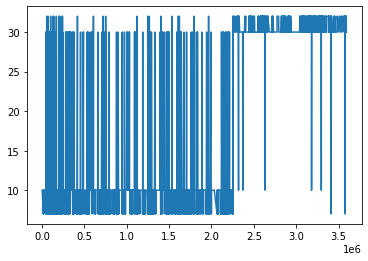

In [10]:
plt.plot(times, classes)

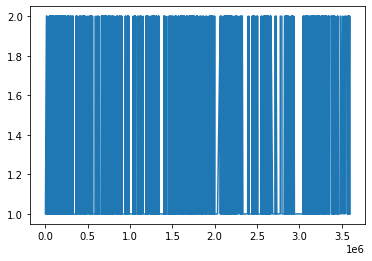

In [11]:
plt.plot(times, clusters)

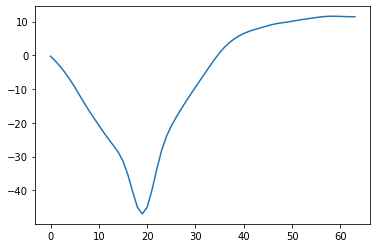

In [12]:
# Calculate and plot the average waveform
avg = np.mean(waveforms, 0)
plt.plot(avg)

### LFP Files

Note: the pickle files need to be loaded with `joblib`.

In [13]:
# Get a list of the available LFP files
lfp_files = os.listdir(pjoin(folder, 'micro_lfp'))

In [14]:
cur_file = pjoin(folder, 'micro_lfp', lfp_files[0])

In [15]:
with open(cur_file, 'rb') as pfile:
    temp = joblib.load(pfile)

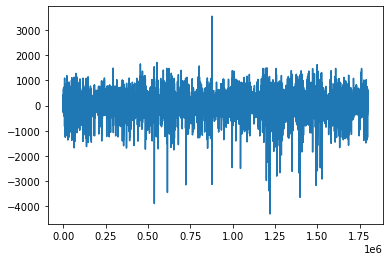

In [16]:
plt.plot(temp)